In [1]:
import numpy as np
import pandas as pd

class FlatFiles:
    def __init__(self,path,delimiter):
        self.path = path
        self.delimiter = delimiter
        
    def load_single_dt_file(self,skiprows = 0,dtype = float,usecols=None):
        """
        Not prefered with mixed datatypes
        Args skiprows: allows you to specify how many rows (not indices) you wish to skip
             usecols: takes a list of the indices of the columns you wish to keep
        returns ndarray
        """
        
        data = np.loadtxt(self.path,delimiter = self.delimiter,dtype=dtype,skiprows=skiprows,usecols=usecols)
        return data
    
    def load_mixed_dt_file(self,names=True,dtype=None):
        """
        Not prefered with mixed datatypes
        Args name: tells us there is a header. Because the data are of different types,
        returns 1D array, where each element of the array is a row of the flat file imported. 
        """
        data = np.genfromtxt(path, delimiter=self.delimiter, names=names, dtype=dtype)
        return data
    


In [2]:
import pickle

class NonFlatFiles:
    
    def __init__(self,path):
        self.path = path
        
    def load_pickle(self):
        """
        Pickling is a way to convert a python object (list, dict, etc.) into a character stream.
        
        loads pickle file (serialized files : converted into bytes)
        """
        with open(self.path, 'rb') as file:
            data = pickle.load(file)
        
        return data

    def load_excel(self):
        """
        Load excel spreadsheet
        
        """
        xls = pd.ExcelFile(self.path)
        
        
    def excel_sheets(self):
        """
        return names of the sheets in the excel file
        
        """
        xls = self.load_excel()
        return xls.sheet_names
    
    def sheet_df(self,sheet_name,skiprows=0,names=None):
        """
        return dataframe of the specified sheet
        
        """
        xls = self.load_excel()
        return xls.parse(sheet_name,skiprows=skiprows,names=names)
    


<class 'h5py._hl.files.File'>
meta
quality
strain
Strain


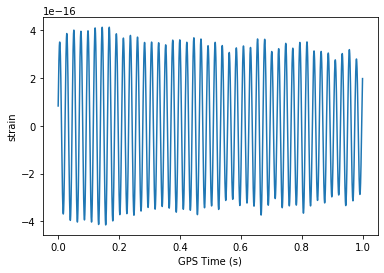

In [4]:
# How to deal with hdf5 files

# Import packages
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Assign filename: file
file = 'Desktop/LIGO_data.hdf5'

# Load file: data
data = h5py.File(file,'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()
